**Load the libraries**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import string
from collections import Counter

Load the dataset

In [3]:
df=pd.read_csv('/content/dataset/combined_emotion.csv')

EDA

In [4]:
print(df.head())

                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear


View some sample data

In [5]:
print(df.sample(10))

                                                sentence emotion
48730  i can feel humiliated and squish around hey th...     sad
45338        i was feeling extremely lonely last weekend     sad
45476  i feel is mellow and minimal and i m liking it...     joy
44560  im not going to post it because its not my sen...     sad
2349   i feel like all the issues will get resolved a...     joy
87141  i wish that i could be a strong christian and ...     sad
10704  i am feeling optimistic about what is going on...     joy
24476          i feel that actually i have a sweet smile     joy
56430  i am finally feeling happy and content about m...     joy
1100   i used an empathetic voice toned statement whe...    fear


Check the data null values and the column with row

In [6]:
print(f"Dataframe size: {df.shape}")
print(df.isnull().sum())

Dataframe size: (91039, 2)
sentence    0
emotion     1
dtype: int64


Show the datasets in bar chart

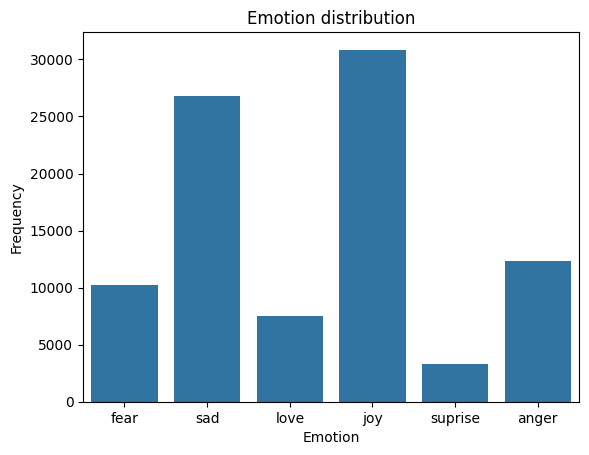

In [7]:
sns.countplot(data=df, x='emotion')
plt.title('Emotion distribution')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

Show the datasets via value per feature

In [8]:
class_counts = df['emotion'].value_counts()
print(class_counts)

emotion
joy        30848
sad        26754
anger      12367
fear       10244
love        7496
suprise     3329
Name: count, dtype: int64


Some useful insights on the sentences of the dataset

We are creating a column with sentences length

In [9]:
# Add column with sentence length (including spaces)
df['sentence_length'] = df['sentence'].apply(len)

Show the length of the sentences via bar chart

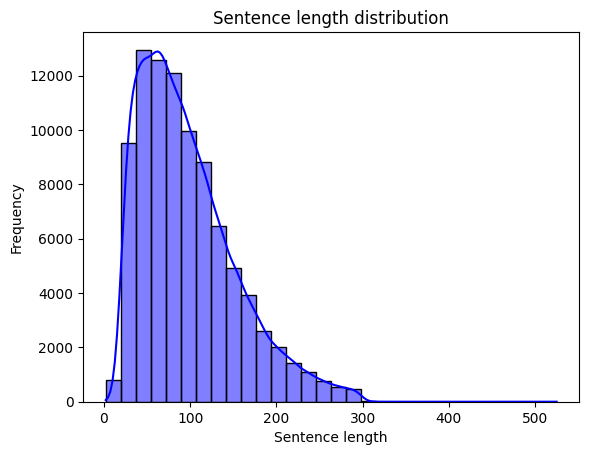

In [10]:
# Show distribution of sentence length
sns.histplot(df['sentence_length'], bins=30, kde=True, color='blue')
plt.title('Sentence length distribution')
plt.xlabel('Sentence length')
plt.ylabel('Frequency')
plt.show()



Show the neccessary information on sentences

In [11]:
# Show sentence length statistics
print(df['sentence_length'].describe())

count    91039.000000
mean        97.047946
std         56.133258
min          2.000000
25%         54.000000
50%         86.000000
75%        128.000000
max        525.000000
Name: sentence_length, dtype: float64


From the sentences column we can consider the max length sentences is 830 character and small length is 2

We can see the sentence_length is also coming with value

In [12]:
print(df.head())

                                            sentence emotion  sentence_length
0      i just feel really helpless and heavy hearted    fear               45
1  ive enjoyed being able to slouch about relax a...     sad              234
2  i gave up my internship with the dmrg and am f...    fear               63
3                         i dont know i feel so lost     sad               26
4  i am a kindergarten teacher and i am thoroughl...    fear              222


Showing each emotion per average sentences length

In [13]:
avg_length_by_emotion = df.groupby('emotion')['sentence_length'].mean().reset_index()

Showing via bar chart

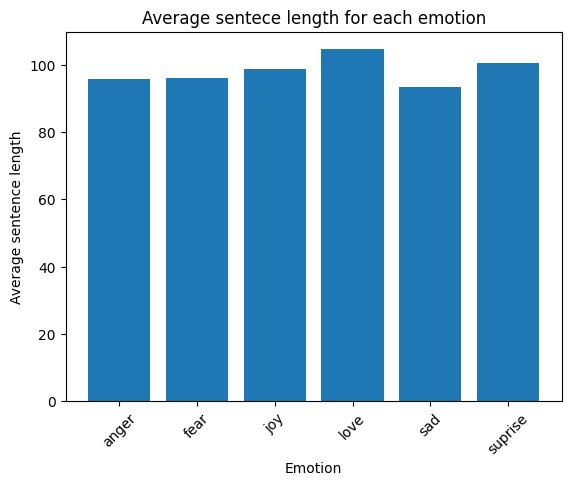

In [14]:
plt.bar(avg_length_by_emotion['emotion'], avg_length_by_emotion['sentence_length'])
plt.xlabel("Emotion")
plt.ylabel("Average sentence length")
plt.title("Average sentece length for each emotion")
plt.xticks(rotation=45)
plt.show()

Download the nltk libraries

In [15]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Text Preprocessing techniques

In [16]:
def preprocess_text(text):
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize sentences
    tokens = word_tokenize(text)
    # Delete stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [17]:
all_words = []
for sentence in df['sentence']:
    all_words.extend(preprocess_text(sentence))


Show the top 20 most popular words from the dataset

In [18]:
max_Words = 20 # number of most popular words

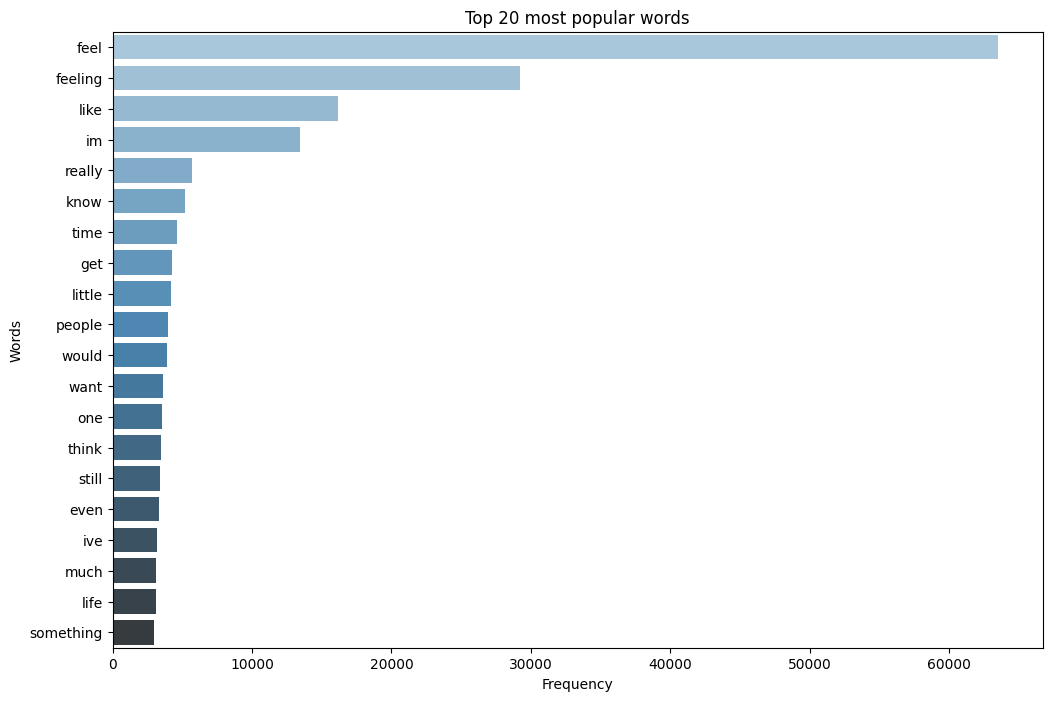

In [19]:
word_freq = Counter(all_words)
common_words = word_freq.most_common(max_Words)

x = [word[1] for word in common_words] # popular words
y = [word[0] for word in common_words] # frequency of popular words

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, hue=y, palette='Blues_d', legend=False)
plt.title(f'Top {max_Words} most popular words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Show the top 10 words from each emotions

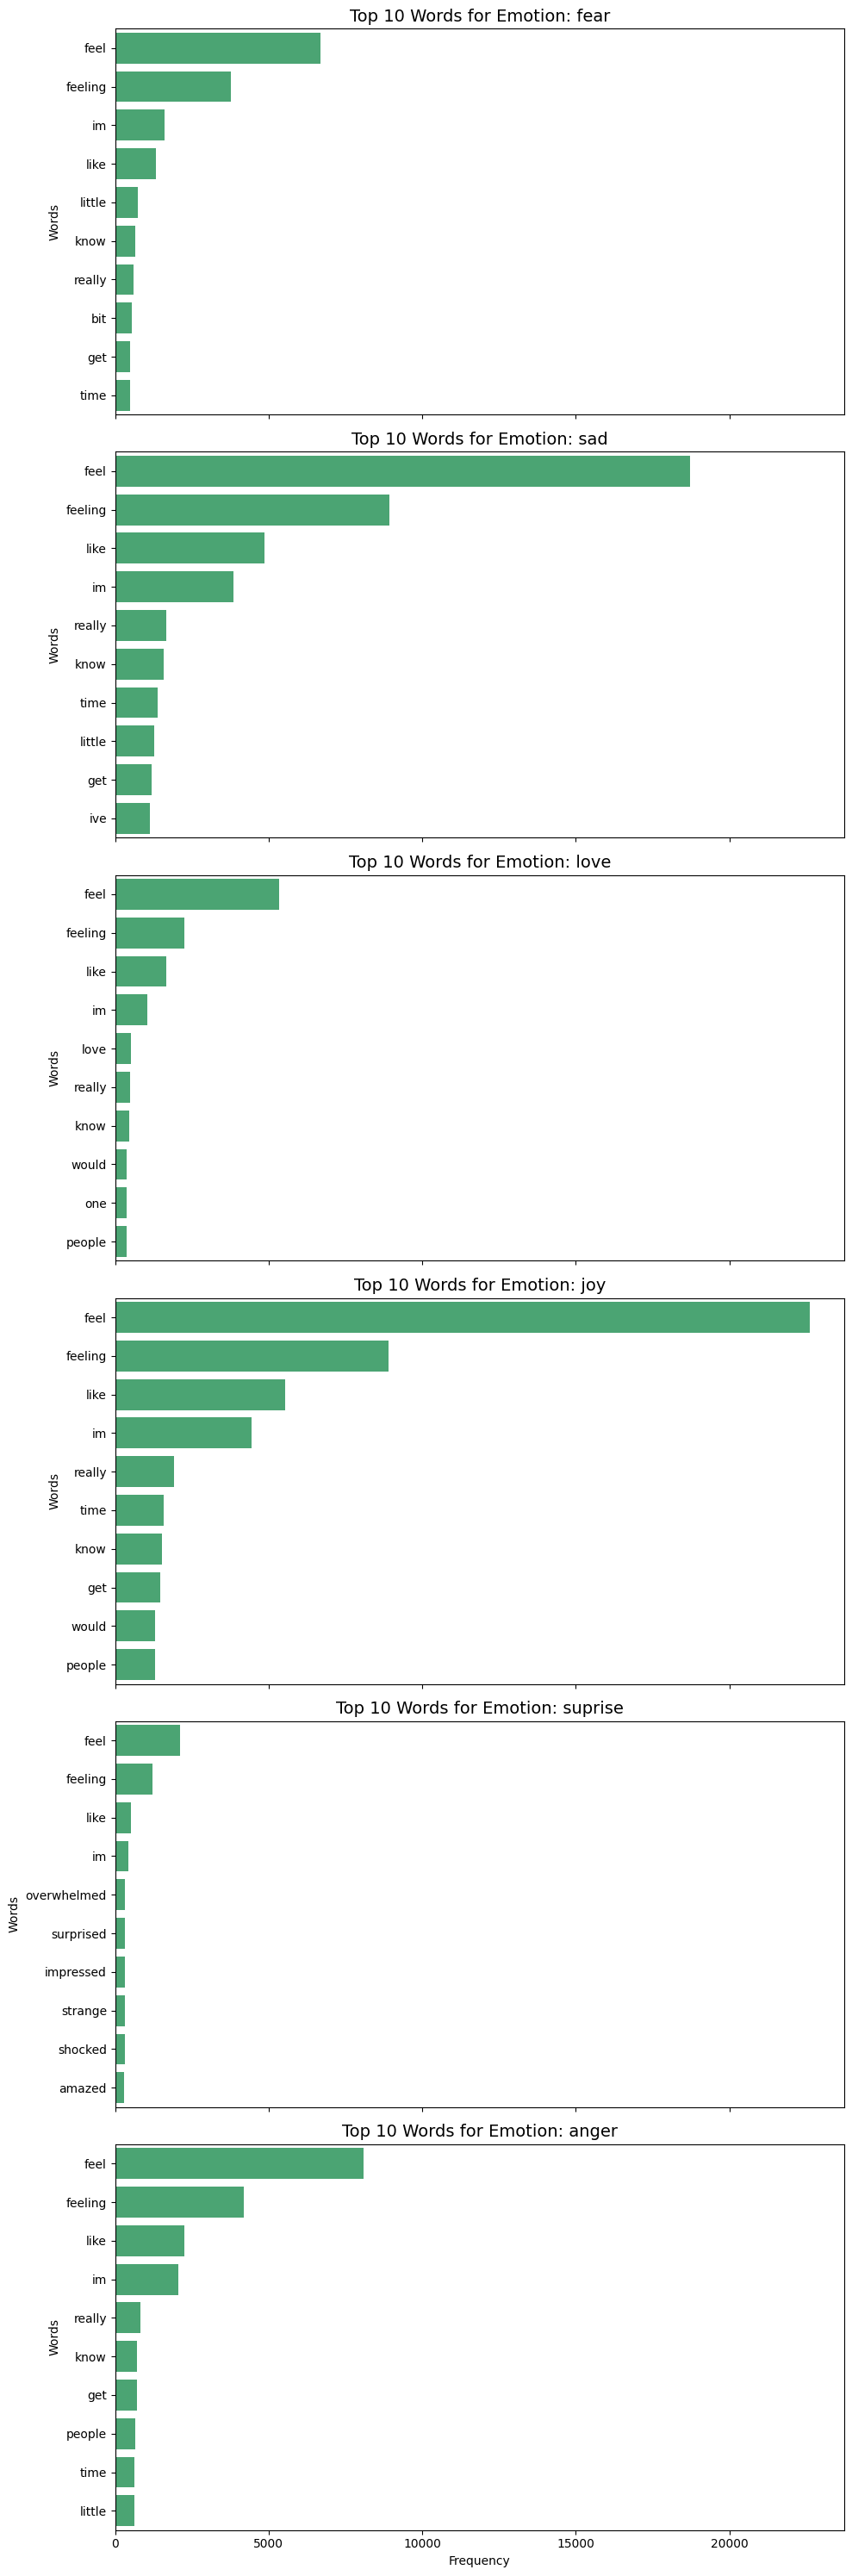

In [21]:
# Calculate word frequencies per emotion
emotion_word_freq = {}
for emotion in df['emotion'].unique():
    # Filter sentences of that emotion
    subset = df[df['emotion'] == emotion]['sentence']
    words = []
    for sentence in subset:
        words.extend(preprocess_text(sentence))  # Clean and tokenize
    # Only keep if not empty
    if words:
        emotion_word_freq[emotion] = Counter(words).most_common(10)
    else:
        emotion_word_freq[emotion] = []

# Remove empty categories for plotting
emotion_word_freq = {k: v for k, v in emotion_word_freq.items() if v}

# Create subplots
num_emotions = len(emotion_word_freq)
fig, axes = plt.subplots(nrows=num_emotions, figsize=(10, 5 * num_emotions), sharex=True)

# Plot each emotion's top 10 words
for i, (emotion, freq) in enumerate(emotion_word_freq.items()):
    words, counts = zip(*freq)  # Unpack word-count pairs
    ax = axes[i] if num_emotions > 1 else axes
    sns.barplot(x=list(counts), y=list(words), color='mediumseagreen', ax=ax)
    ax.set_title(f'Top 10 Words for Emotion: {emotion}', fontsize=14)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')

plt.tight_layout()
plt.show()

show the datasets

In [22]:
print(df.head())

                                            sentence emotion  sentence_length
0      i just feel really helpless and heavy hearted    fear               45
1  ive enjoyed being able to slouch about relax a...     sad              234
2  i gave up my internship with the dmrg and am f...    fear               63
3                         i dont know i feel so lost     sad               26
4  i am a kindergarten teacher and i am thoroughl...    fear              222


Split the datasets into train and test datasets

In [24]:
print(df.isnull().sum())


sentence           0
emotion            1
sentence_length    0
dtype: int64


In [25]:
df = df.dropna(subset=["sentence", "emotion"])


In [26]:
X = df["sentence"]
y = df["emotion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

emotion
joy        0.338844
sad        0.293876
anger      0.135851
fear       0.112522
love       0.082342
suprise    0.036565
Name: proportion, dtype: float64
emotion
joy        0.338862
sad        0.293882
anger      0.135819
fear       0.112533
love       0.082326
suprise    0.036577
Name: proportion, dtype: float64


Do the vectorization

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Apply class weight logistic Regression

In [29]:
model = LogisticRegression( solver='lbfgs', class_weight='balanced', max_iter=200)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8969134446397188

Classification report:
               precision    recall  f1-score   support

       anger       0.87      0.92      0.90      2473
        fear       0.85      0.87      0.86      2049
         joy       0.97      0.87      0.92      6170
        love       0.72      0.95      0.82      1499
         sad       0.96      0.90      0.93      5351
     suprise       0.69      0.95      0.80       666

    accuracy                           0.90     18208
   macro avg       0.84      0.91      0.87     18208
weighted avg       0.91      0.90      0.90     18208



Logistic Regression

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8959248681898067

Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.88      0.89      2473
        fear       0.87      0.84      0.85      2049
         joy       0.90      0.94      0.92      6170
        love       0.83      0.74      0.78      1499
         sad       0.92      0.94      0.93      5351
     suprise       0.83      0.71      0.76       666

    accuracy                           0.90     18208
   macro avg       0.88      0.84      0.86     18208
weighted avg       0.89      0.90      0.89     18208



Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [34]:
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate
print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Random Forest
Accuracy: 0.8790092267135325
Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.88      0.88      2473
        fear       0.82      0.85      0.83      2049
         joy       0.90      0.90      0.90      6170
        love       0.79      0.73      0.76      1499
         sad       0.92      0.92      0.92      5351
     suprise       0.75      0.77      0.76       666

    accuracy                           0.88     18208
   macro avg       0.84      0.84      0.84     18208
weighted avg       0.88      0.88      0.88     18208



Linear SVM

In [35]:
from sklearn.svm import LinearSVC

# Initialize and train
svm_model = LinearSVC(dual=False, class_weight='balanced')
svm_model.fit(X_train_tfidf, y_train)




LinearSVC(class_weight='balanced', dual=False)

In [36]:
# Predict
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
print("🔹 Linear SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

🔹 Linear SVM
Accuracy: 0.9037785588752196
Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.92      0.90      2473
        fear       0.85      0.87      0.86      2049
         joy       0.95      0.90      0.92      6170
        love       0.75      0.90      0.82      1499
         sad       0.95      0.93      0.94      5351
     suprise       0.75      0.87      0.80       666

    accuracy                           0.90     18208
   macro avg       0.86      0.90      0.87     18208
weighted avg       0.91      0.90      0.91     18208

